# Visualizing FordGoBike Data

### By Shweta Singh

## Investigation Overview

In this investigation of the Ford GoBike system, I wanted to look at the most common customer behaviors and characteristics, precisely how user type, time, gender, and age impacts usage of the system.


## Dataset Overview

Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once the expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, East Bay, and San Jose.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy, and durable bikes that have locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements, and more. It's a fun, convenient, and affordable way to get around.

The bikes are available 24 hours/day, seven days/week, 365 days/year, and riders have access to all bikes in the network when they become a member or purchase a pass.



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import glob
import os
import datetime
import math
from math import radians, sin, cos, acos
no_color = sb.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df_cleaned = pd.read_csv('fordgobike_tripdata_clean.csv')
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,member_age,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km,distance_miles
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,No,33,January,1,Wed,22,19,1254,2.492254,1.548614
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,...,No,23,January,1,Wed,14,10,1192,2.974502,1.848270
2,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,...,No,28,January,1,Wed,19,6,666,2.440571,1.516500
3,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,...,No,31,January,1,Wed,23,0,7,1.341918,0.833829
4,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,No,39,January,1,Wed,23,23,3,0.632718,0.393153


## Ford GoBike Usage by Month

Not surprisingly, the summer months and early-mid autumn are the most popular times to use the Ford Go Bike sharing system. October is the most popular month, with July as the second most popular, and June/August is the third most popular month to use the bike system. The weather in San Francisco is best in the mid-late summer and usually stays sunny until returning to its usual foggy weather in the late autumn/early winter months.

<Figure size 841.68x595.44 with 0 Axes>

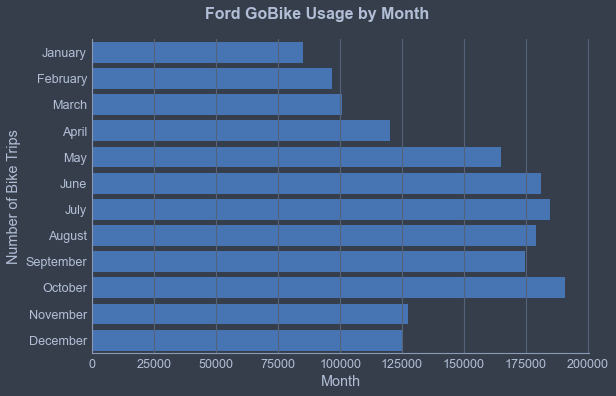

In [3]:
# Monthly usage of the Ford Go Bike system
plt.figure(figsize=[ 11.69, 8.27]);

graph = sb.catplot(data = df_cleaned, y = 'start_time_month', kind = 'count', color = no_color, aspect = 1.7);

graph.set_axis_labels('Month', 'Number of Bike Trips');

graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

## Ford GoBike Usage by Hour


The bikes saw the most usage during the morning hours of 8-9 am and in the afternoon hours of 5-6 pm, a typical workday in the United States. It furthers the suggestion that bikes are being used primarily for commuters.

<Figure size 841.68x595.44 with 0 Axes>

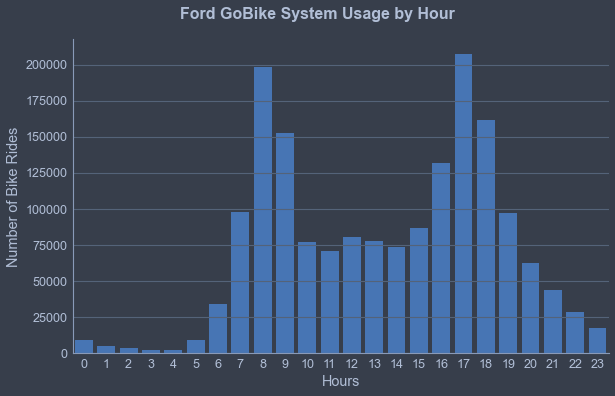

In [4]:
# Hourly usage of the Ford Go Bike System
plt.figure(figsize=[ 11.69, 8.27]);

graph = sb.catplot(data = df_cleaned, x='start_time_hour', kind='count', color = no_color, aspect = 1.7)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

## Ford GoBike System Trends by User Type


The point plot below is an excellent visual showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

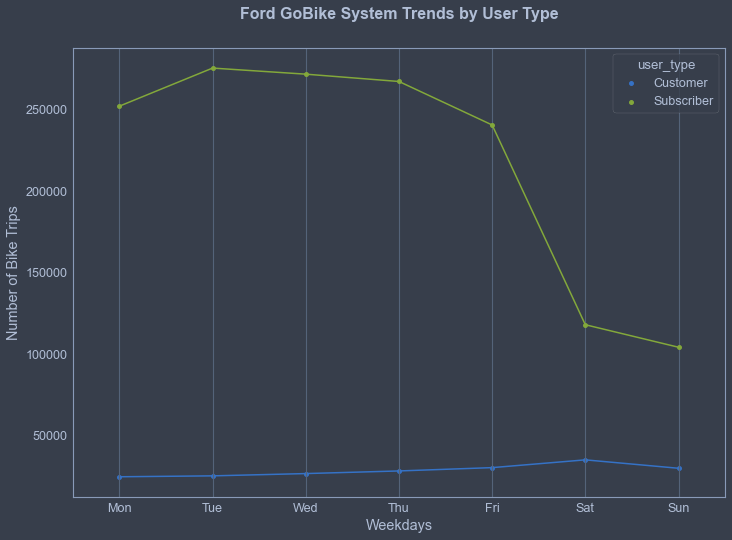

In [5]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=[ 11.69, 8.27]);

df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

## Ford Go Bike System - Duration (Min) by User Type


The catplot and boxplot show the ride duration spread in minutes (note the y-axis not shared between the Customer and Subscriber graphs to visualize trends easier). Customers typically have longer trip durations (8 to 18 minutes according to the box plot) than subscribers (5 to 12 minutes according to the box plot). It can probably explain that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

<Figure size 841.68x595.44 with 0 Axes>

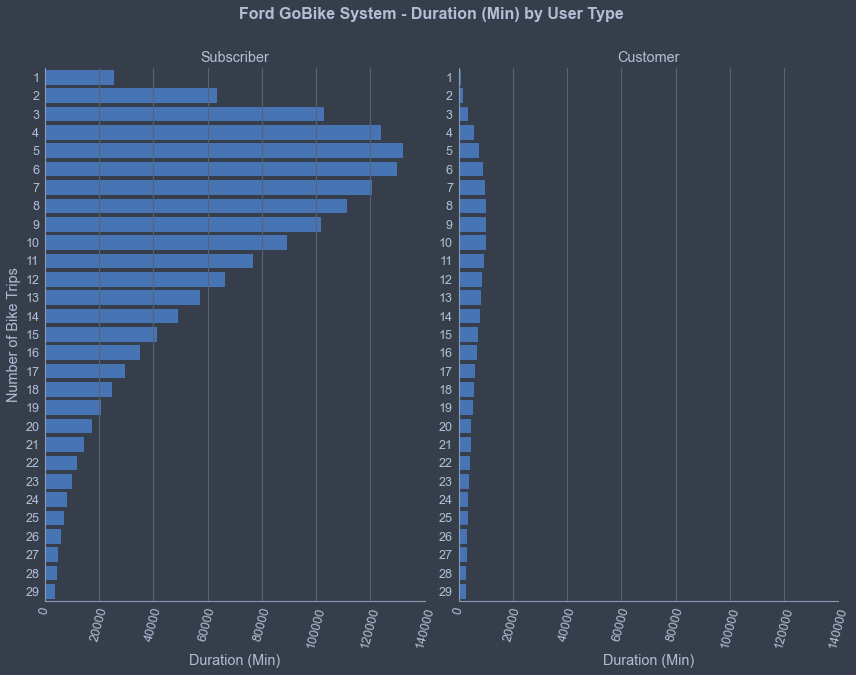

In [6]:
# Customer Usage by Duration vs. Subscriber Usage by Duration
plt.figure(figsize=[ 11.69, 8.27]);

data = df_cleaned.query('duration_min < 30')

graph = sb.catplot(data=data, y = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height = 8.27,  aspect = (11.69/2)/8.27);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

<Figure size 841.68x595.44 with 0 Axes>

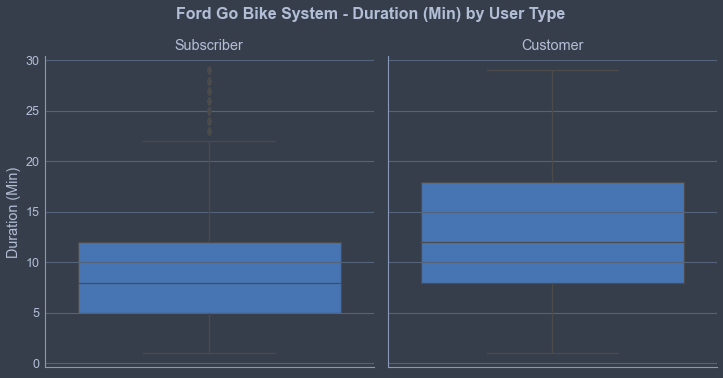

In [8]:
plt.figure(figsize=[11.69, 8.27]);

data = df_cleaned.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = no_color);

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

## Ford GoBike System - Monthly Bike Trips Per Subscribers' Age Group


Subscribers who fall in the age group between 26-35 years old are the most common age group to use the bike-sharing system. The 26-35 years old also leads the spike across all age groups in October. Subscribers who fall in the 36-45-year-old age group are the next most common age group to use the bike-sharing system and follow a similar trend at the 26-35-year-olds. The youngest age group, 15-25 years old, starts with very few rides (comparative to the entire dataset) but generally increases throughout the year when they reach their first spike in July. Then with a slight drop during August and September, another spike in October before decreasing again for the rest of the year. It follows the traditional school year, with the summer months of June - September designated as a break from school.

In [9]:
df_cleaned['age_bins'] = df_cleaned['member_age'].apply(lambda x: '15 - 25' if 15<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 66' if 55<x<=66
                                                       else x)

In [10]:
subscriber_age_df = df_cleaned[df_cleaned['user_type'] == 'Subscriber'].groupby(['start_time_month', 'age_bins']).agg({'bike_id':'count'}).reset_index()

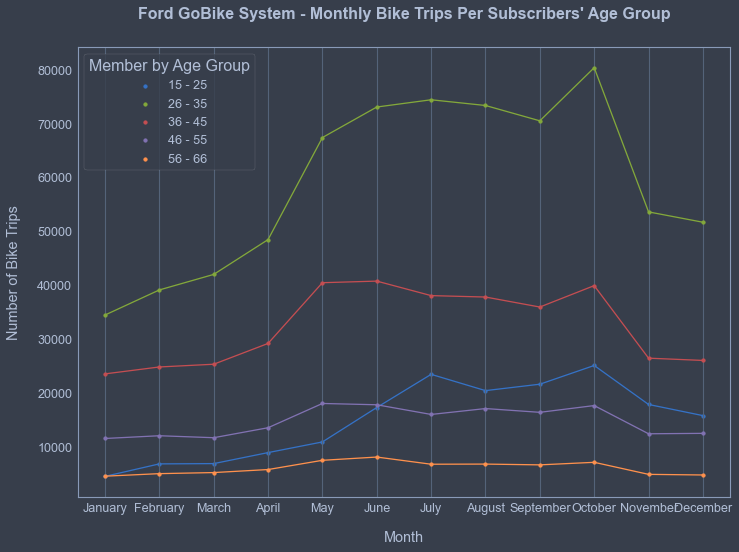

In [11]:
# Comparing monthly number of bike trips per subscribers, based on their age group (reference age bins I calculated above)
plt.figure(figsize=[11.69, 8.27]);

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

ax = sb.pointplot(data = subscriber_age_df, x='start_time_month', y='bike_id', hue='age_bins', scale=.6, order = months);

plt.xlabel('Month', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Ford GoBike System - Monthly Bike Trips Per Subscribers' Age Group", y = 1.05, fontsize = 16, fontweight = 'bold');

# Legend
leg = ax.legend()
leg.set_title('Member by Age Group', prop={'size': 16})

plt.grid()

## Ford GoBike System - Start Time vs. Weekday by User Type

Customers use the bike-sharing system more often on weekends, while Subscribers primarily use the bikes on weekdays. Customers: During weekdays, most bike rides occur between 4-6 pm, peaking on Fridays around 5 pm. Most bike riders occur between 11 am and 6 pm during weekends, peaking on Saturdays around 2 pm. Subscribers: Most bike rides occur around 8-9am and 4-6 pm during weekdays. During weekends, there is a significant drop in the number of rented bikes.

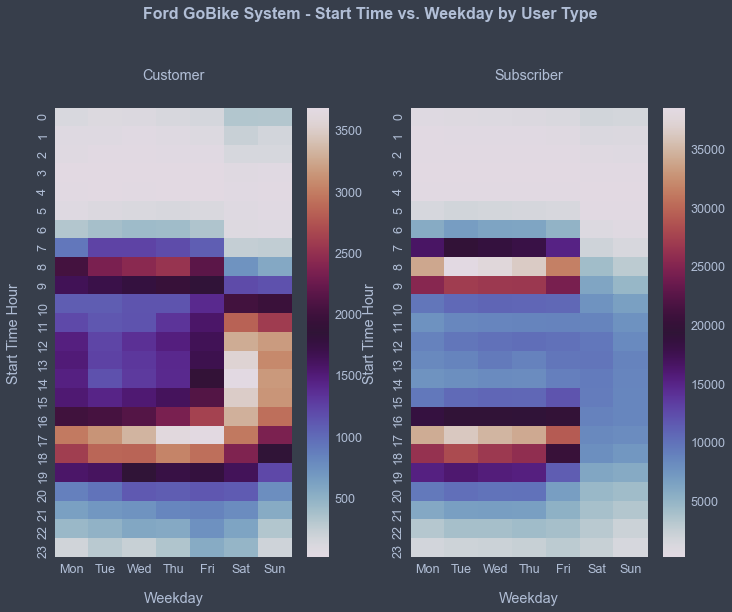

In [12]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_cleaned['start_time_weekday'] = pd.Categorical(df_cleaned['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

plt.figure(figsize=[11.69, 8.27]);

# Heatmap - Customers
plt.subplot(1, 2, 1)
df_customer = df_cleaned.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

# Heatmap - Subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_cleaned.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.suptitle('Ford GoBike System - Start Time vs. Weekday by User Type', y = 1.05, fontsize = 16, fontweight = 'bold');

## Ford GoBike System - Summary

This project is a win-win situation where a large number of people can benefit from this program:

* Environmentally friendly, budget-friendly, and lifestyle friendly.
* Subscribers (i.e., daily commuters) benefit from a healthy commuting choice
* Customers (i.e., tourists, students, etc.) have a sustainable yet flexible option for touring the city.
* Affordable and convenient transportation for people of all socioeconomic classes
* Renting a bike from the Ford GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in the city, both for enjoyment and work.

There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters who have short trips to and from work and rent a bike on weekdays at 8-9 am and 5-6 pm. Customers are usually tourists or occasional riders who use the system mainly on weekends to explore the Bay Area. Age is also a factor within user type. Subscribers who fall in the age group between 26-35 years old are the most common age group to use the bike-sharing system. The 26-35 years old also leads the spike across all age groups in October. Subscribers who fall in the 36-45-year-old age group are the next most common age group to use the bike-sharing system and follow a similar trend at the 26-35-year-olds.

In [13]:
!jupyter nbconvert Communicate_data_slides.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Communicate_data_slides.ipynb to slides
[NbConvertApp] Writing 887621 bytes to Communicate_data_slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\sshwe\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\sshwe\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\sshwe\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\sshwe\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\sshwe\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename